<a href="https://colab.research.google.com/github/Far0311/Data-Analysis-with-Phyton/blob/main/TextBlob_and_VADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Original Code

Sentiment Distribution:
Positive: 3
Negative: 2
Neutral: 0


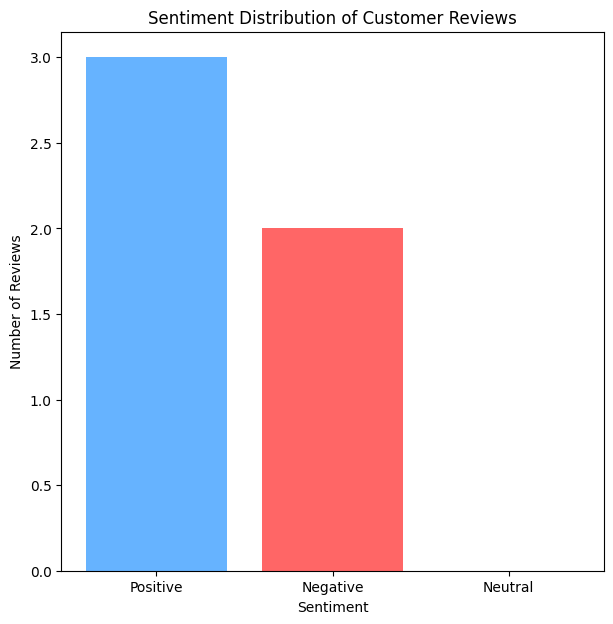

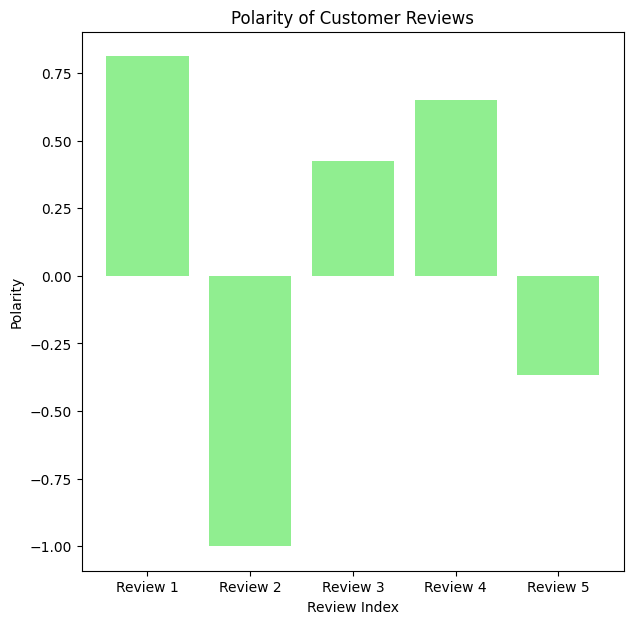

In [1]:
# Install necessary libraries
# pip install textblob matplotlib

from textblob import TextBlob
import matplotlib.pyplot as plt

# Sample customer reviews
customer_reviews = [
    "I absolutely love this product! It works wonderfully.",
    "The product quality is terrible. I want a refund.",
    "This is an okay product, nothing special but works fine.",
    "I’m very satisfied with my purchase. It exceeded my expectations.",
    "Worst purchase I’ve ever made. Complete waste of money."
]

# Function to perform sentiment analysis with TextBlob
def analyze_sentiment_textblob(review):
    # Create a TextBlob object
    blob = TextBlob(review)

    # Get the sentiment polarity
    polarity = blob.sentiment.polarity

    # Classify sentiment based on polarity score
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment, polarity

# Analyzing sentiment for each review
sentiments = {"Positive": 0, "Negative": 0, "Neutral": 0}
polarities = []

for review in customer_reviews:
    sentiment, polarity = analyze_sentiment_textblob(review)
    sentiments[sentiment] += 1
    polarities.append(polarity)

# Print sentiment distribution
print("Sentiment Distribution:")
print(f"Positive: {sentiments['Positive']}")
print(f"Negative: {sentiments['Negative']}")
print(f"Neutral: {sentiments['Neutral']}")

# Visualization: Bar chart for sentiment distribution
labels = ['Positive', 'Negative', 'Neutral']
sizes = [sentiments['Positive'], sentiments['Negative'], sentiments['Neutral']]
colors = ['#66b3ff','#ff6666','#99ff99']

# Create a bar chart for sentiment distribution
plt.figure(figsize=(7,7))
plt.bar(labels, sizes, color=colors)
plt.title("Sentiment Distribution of Customer Reviews")
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Visualization: Bar chart for polarity scores of each review
plt.figure(figsize=(7,7))
plt.bar(range(len(customer_reviews)), polarities, color='lightgreen')
plt.title("Polarity of Customer Reviews")
plt.xlabel('Review Index')
plt.ylabel('Polarity')
plt.xticks(range(len(customer_reviews)), [f"Review {i+1}" for i in range(len(customer_reviews))])
plt.show()


Explanation of your codes


# changing the input data

Sentiment Distribution:
Positive: 5
Negative: 2
Neutral: 0


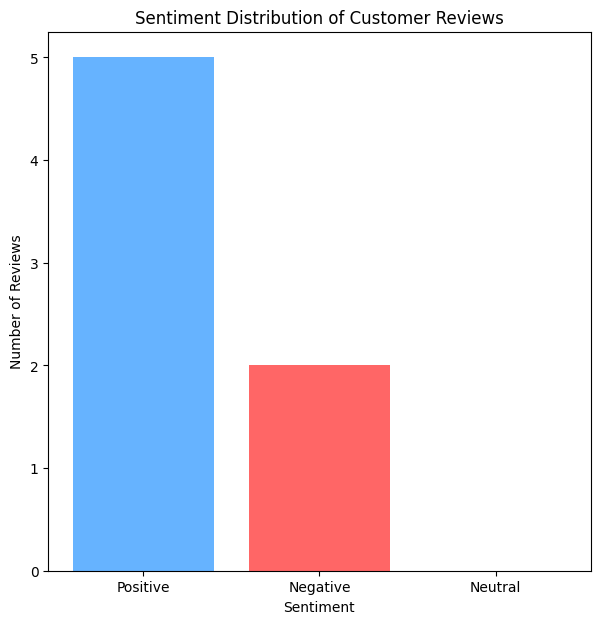

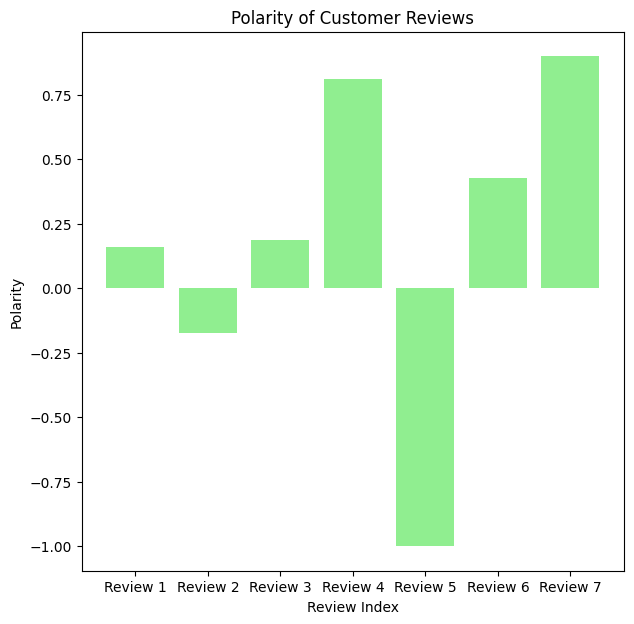

In [2]:
# Install necessary libraries
# pip install textblob matplotlib

from textblob import TextBlob
import matplotlib.pyplot as plt

# Sample customer reviews
# Data input change to test the function
customer_reviews = [
    "This product exceeded my expectations! Highly recommended.",
    "Not worth the money. It broke after just a few uses.",
    "Decent quality, but I expected better for the price.",
    "Absolutely love it! The best purchase I’ve made this year.",
    "Terrible customer service. I won’t be buying from here again.",
    "It’s okay, nothing special but does the job.",
    "Superb value for money! I’m really happy with it."
]

# Function to perform sentiment analysis with TextBlob
def analyze_sentiment_textblob(review):
    # Create a TextBlob object
    blob = TextBlob(review)

    # Get the sentiment polarity
    polarity = blob.sentiment.polarity

    # Classify sentiment based on polarity score
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment, polarity

# Analyzing sentiment for each review
sentiments = {"Positive": 0, "Negative": 0, "Neutral": 0}
polarities = []

for review in customer_reviews:
    sentiment, polarity = analyze_sentiment_textblob(review)
    sentiments[sentiment] += 1
    polarities.append(polarity)

# Print sentiment distribution
print("Sentiment Distribution:")
print(f"Positive: {sentiments['Positive']}")
print(f"Negative: {sentiments['Negative']}")
print(f"Neutral: {sentiments['Neutral']}")

# Visualization: Bar chart for sentiment distribution
labels = ['Positive', 'Negative', 'Neutral']
sizes = [sentiments['Positive'], sentiments['Negative'], sentiments['Neutral']]
colors = ['#66b3ff','#ff6666','#99ff99']

# Create a bar chart for sentiment distribution
plt.figure(figsize=(7,7))
plt.bar(labels, sizes, color=colors)
plt.title("Sentiment Distribution of Customer Reviews")
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Visualization: Bar chart for polarity scores of each review
plt.figure(figsize=(7,7))
plt.bar(range(len(customer_reviews)), polarities, color='lightgreen')
plt.title("Polarity of Customer Reviews")
plt.xlabel('Review Index')
plt.ylabel('Polarity')
plt.xticks(range(len(customer_reviews)), [f"Review {i+1}" for i in range(len(customer_reviews))])
plt.show()


I changed the input for customer reviews. interesting, review 6 is shown to be a positive review by the python function. personally, i would rate it close to neutral.

# Code modified to use VADER

In [4]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


Sentiment Distribution:
Positive: 3
Negative: 2
Neutral: 0


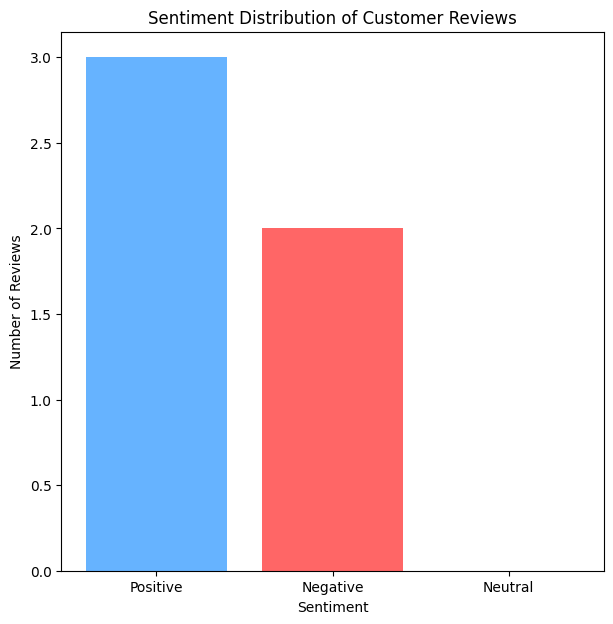

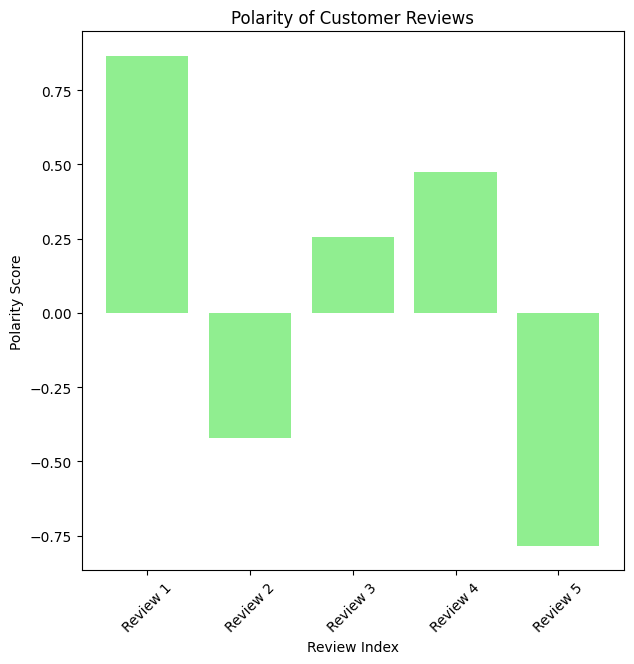

In [6]:
# Install necessary libraries
# pip install vaderSentiment matplotlib pandas

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd

# Sample customer reviews 1
customer_reviews1 = [
    "I absolutely love this product! It works wonderfully.",
    "The product quality is terrible. I want a refund.",
    "This is an okay product, nothing special but works fine.",
    "I’m very satisfied with my purchase. It exceeded my expectations.",
    "Worst purchase I’ve ever made. Complete waste of money."
]

# Sample customer reviews2
customer_reviews2 = [
    "This product exceeded my expectations! Highly recommended.",
    "Not worth the money. It broke after just a few uses.",
    "Decent quality, but I expected better for the price.",
    "Absolutely love it! The best purchase I’ve made this year.",
    "Terrible customer service. I won’t be buying from here again.",
    "It’s okay, nothing special but does the job.",
    "Superb value for money! I’m really happy with it."
]

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment using VADER
def analyze_sentiment_vader(review):
    sentiment_scores = analyzer.polarity_scores(review)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment = "Positive"
    elif compound_score <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment, compound_score

# Analyze sentiment for each review
sentiments = {"Positive": 0, "Negative": 0, "Neutral": 0}
polarities = []

for review in customer_reviews1:
    sentiment, polarity = analyze_sentiment_vader(review)
    sentiments[sentiment] += 1
    polarities.append(polarity)

# Print sentiment distribution
print("Sentiment Distribution:")
print(f"Positive: {sentiments['Positive']}")
print(f"Negative: {sentiments['Negative']}")
print(f"Neutral: {sentiments['Neutral']}")

# Visualization: Bar chart for sentiment distribution
plt.figure(figsize=(7,7))
plt.bar(sentiments.keys(), sentiments.values(), color=['#66b3ff','#ff6666','#99ff99'])
plt.title("Sentiment Distribution of Customer Reviews")
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Visualization: Bar chart for polarity scores of each review
plt.figure(figsize=(7,7))
plt.bar(range(len(customer_reviews1)), polarities, color='lightgreen')
plt.title("Polarity of Customer Reviews")
plt.xlabel('Review Index')
plt.ylabel('Polarity Score')
plt.xticks(range(len(customer_reviews1)), [f"Review {i+1}" for i in range(len(customer_reviews1))], rotation=45)
plt.show()


Interestingly, for review 2 and 5: "The product quality is terrible. I want a refund." and "Worst purchase I’ve ever made. Complete waste of money." are rated at a different polarity score than when it is using the TextBlob



Sentiment Distribution:
Positive: 4
Negative: 2
Neutral: 1


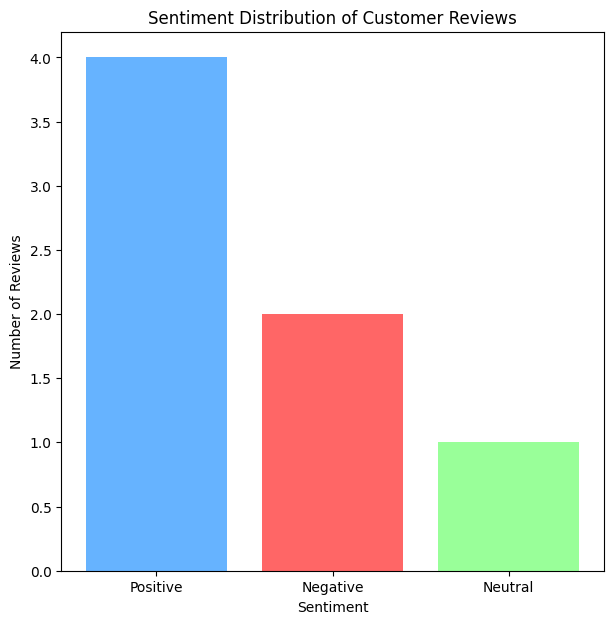

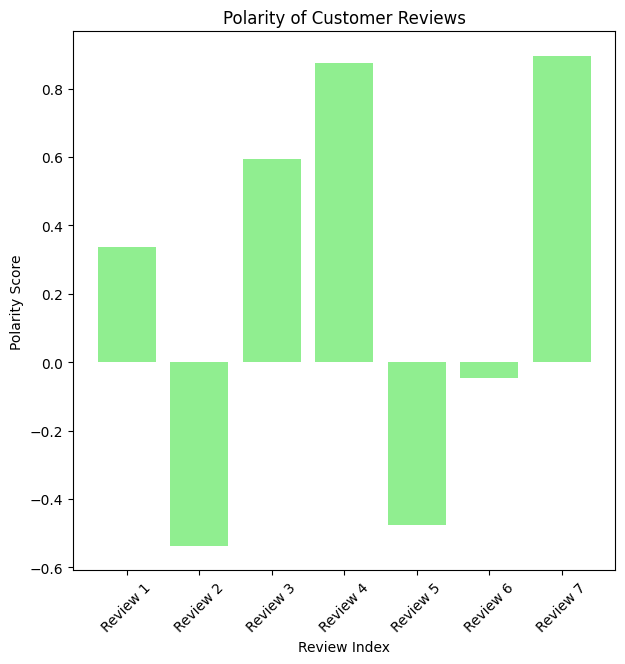

In [7]:
# Sample customer reviews2
customer_reviews2 = [
    "This product exceeded my expectations! Highly recommended.",
    "Not worth the money. It broke after just a few uses.",
    "Decent quality, but I expected better for the price.",
    "Absolutely love it! The best purchase I’ve made this year.",
    "Terrible customer service. I won’t be buying from here again.",
    "It’s okay, nothing special but does the job.",
    "Superb value for money! I’m really happy with it."
]

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment using VADER
def analyze_sentiment_vader(review):
    sentiment_scores = analyzer.polarity_scores(review)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment = "Positive"
    elif compound_score <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return sentiment, compound_score

# Analyze sentiment for each review
sentiments = {"Positive": 0, "Negative": 0, "Neutral": 0}
polarities = []

for review in customer_reviews2:
    sentiment, polarity = analyze_sentiment_vader(review)
    sentiments[sentiment] += 1
    polarities.append(polarity)

# Print sentiment distribution
print("Sentiment Distribution:")
print(f"Positive: {sentiments['Positive']}")
print(f"Negative: {sentiments['Negative']}")
print(f"Neutral: {sentiments['Neutral']}")

# Visualization: Bar chart for sentiment distribution
plt.figure(figsize=(7,7))
plt.bar(sentiments.keys(), sentiments.values(), color=['#66b3ff','#ff6666','#99ff99'])
plt.title("Sentiment Distribution of Customer Reviews")
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Visualization: Bar chart for polarity scores of each review
plt.figure(figsize=(7,7))
plt.bar(range(len(customer_reviews2)), polarities, color='lightgreen')
plt.title("Polarity of Customer Reviews")
plt.xlabel('Review Index')
plt.ylabel('Polarity Score')
plt.xticks(range(len(customer_reviews2)), [f"Review {i+1}" for i in range(len(customer_reviews2))], rotation=45)
plt.show()


Review 6 "It’s okay, nothing special but does the job." is neutral when using VADER but slightly positive when using TextBlob